<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/amazon-sentiment-analysis/blob/master/Multi_class_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets

##Dataset 1

In [3]:
dataset1=pd.read_json('https://raw.githubusercontent.com/AnirbanMukherjeeXD/amazon-sentiment-analysis/master/dataset/Amazon_Instant_Video_5.json?token=AIJPU64KFFGET5BHPE3UMN25ILUTA',lines=True).loc[:,['overall','reviewText']]
dataset1.head()

,overall,reviewText
0,2,I had big expectations because I love English ...
1,5,I highly recommend this series. It is a must f...
2,1,This one is a real snoozer. Don't believe anyt...
3,4,Mysteries are interesting. The tension betwee...
4,5,"This show always is excellent, as far as briti..."


5    56.267845
4    22.749556
3    11.277811
2     5.077304
1     4.627485
Name: overall, dtype: float64

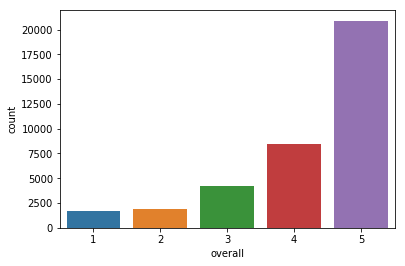

In [24]:
sns.countplot(dataset1['overall'])
pd.Series(dataset1['overall']).value_counts()*100/pd.Series(dataset1['overall']).count()

###Oversampling

In [0]:
class1=dataset1[dataset1['overall']==1]
class2=dataset1[dataset1['overall']==2]
class3=dataset1[dataset1['overall']==3]

In [0]:
class1_new=class1
class2_new=class2
class3_new=class3

for i in range(8):
  class1_new=pd.concat([class1_new,class1])

for i in range(5):
  class2_new=pd.concat([class2_new,class2])
  
for i in range(2):
  class3_new=pd.concat([class3_new,class3])
  
dataset1=pd.concat([dataset1,class1_new,class2_new,class3_new])

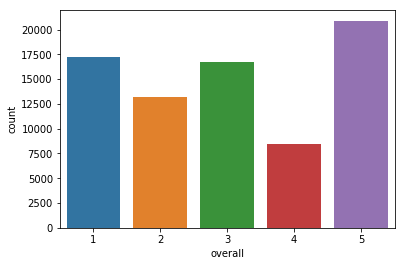

In [11]:
sns.countplot(dataset1['overall'])

##Dataset 2

In [12]:
dataset2=pd.read_json('https://raw.githubusercontent.com/AnirbanMukherjeeXD/amazon-sentiment-analysis/master/dataset/Musical_Instruments_5.json?token=AIJPU64JB3LPJO2NWXOHZF25IELI6',lines=True).loc[:,['overall','reviewText']]
dataset2.head()

,overall,reviewText
0,5,"Not much to write about here, but it does exac..."
1,5,The product does exactly as it should and is q...
2,5,The primary job of this device is to block the...
3,5,Nice windscreen protects my MXL mic and preven...
4,5,This pop filter is great. It looks and perform...


5    67.615242
4    20.309911
3     7.523633
2     2.436410
1     2.114804
Name: overall, dtype: float64

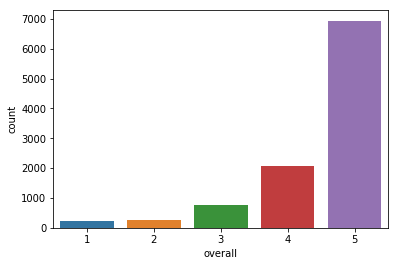

In [13]:
sns.countplot(dataset2['overall'])
pd.Series(dataset2['overall']).value_counts()*100/pd.Series(dataset2['overall']).count()

###Oversampling

In [0]:
class1=dataset2[dataset2['overall']==1]
class2=dataset2[dataset2['overall']==2]
class3=dataset2[dataset2['overall']==3]

In [0]:
class1_new=class1
class2_new=class2
class3_new=class3

for i in range(8):
  class1_new=pd.concat([class1_new,class1])

for i in range(5):
  class2_new=pd.concat([class2_new,class2])
  
for i in range(2):
  class3_new=pd.concat([class3_new,class3])
  
dataset2=pd.concat([dataset2,class1_new,class2_new,class3_new])

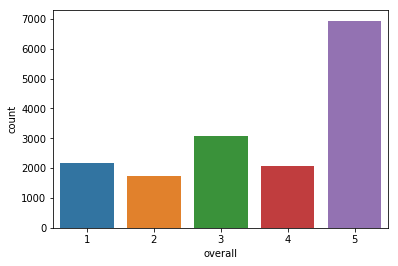

In [16]:
sns.countplot(dataset2['overall'])

#Preprocessing

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X1=dataset1['reviewText'].values
Y1=dataset1['overall'].values

In [0]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X1)
X1 = tokenizer.texts_to_sequences(X1)
X1 = pad_sequences(X1)

Y1=Y1-1
Y1 = to_categorical(Y1)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,train_size=0.8)

In [0]:
X2=dataset2['reviewText'].values
Y2=dataset2['overall'].values

In [0]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X2)
X2 = tokenizer.texts_to_sequences(X2)
X2 = pad_sequences(X2)

Y2=Y2-1
Y2 = to_categorical(Y2)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2,train_size=0.8)

#Models

In [0]:
import keras 
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, GRU
from keras.models import Sequential

##Simple RNN 1

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X1.shape[1],dropout=0.2))
model.add(SimpleRNN((30), dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

W0728 10:38:26.274652 140410360817536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 10:38:26.317338 140410360817536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 10:38:26.324602 140410360817536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 10:38:26.397251 140410360817536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0728 10:38:26.404360 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2488, 128)         320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                4770      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 155       
Total params: 324,925
Trainable params: 324,925
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train1,Y_train1,epochs=10,validation_data=(X_test1,Y_test1),batch_size=500)

W0728 10:38:28.921906 140410360817536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 98s 3ms/step - loss: 1.5572 - acc: 0.3130 - val_loss: 1.2656 - val_acc: 0.5656
Epoch 2/10
29700/29700 [==============================] - 91s 3ms/step - loss: 1.3845 - acc: 0.4463 - val_loss: 1.1979 - val_acc: 0.5654
Epoch 3/10
29700/29700 [==============================] - 89s 3ms/step - loss: 1.2786 - acc: 0.5223 - val_loss: 1.1839 - val_acc: 0.5657
Epoch 4/10
29700/29700 [==============================] - 90s 3ms/step - loss: 1.2323 - acc: 0.5425 - val_loss: 1.1791 - val_acc: 0.5667
Epoch 5/10
29700/29700 [==============================] - 89s 3ms/step - loss: 1.2166 - acc: 0.5495 - val_loss: 1.1765 - val_acc: 0.5671
Epoch 6/10
29700/29700 [==============================] - 89s 3ms/step - loss: 1.1990 - acc: 0.5535 - val_loss: 1.1738 - val_acc: 0.5676
Epoch 7/10
29700/29700 [==============================] - 90s 3ms/step - loss: 1.1975 - acc: 0.5541 - val_loss: 1.1715 - val_acc:

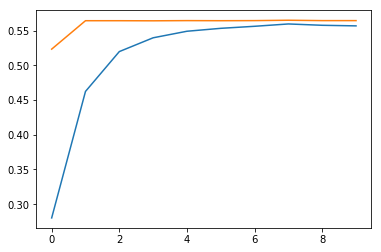

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

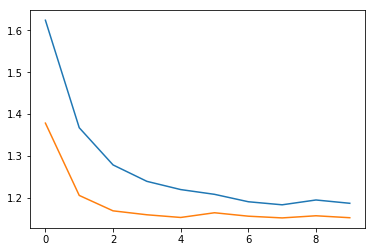

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Simple RNN 2

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X2.shape[1],dropout=0.2))
model.add(SimpleRNN((30), dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1844, 128)         320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                4770      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 155       
Total params: 324,925
Trainable params: 324,925
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train2,Y_train2,epochs=10,validation_data=(X_test2,Y_test2),batch_size=500)

Train on 8208 samples, validate on 2053 samples
Epoch 1/10
8208/8208 [==============================] - 22s 3ms/step - loss: 1.6353 - acc: 0.2607 - val_loss: 1.4276 - val_acc: 0.5626
Epoch 2/10
8208/8208 [==============================] - 21s 3ms/step - loss: 1.5387 - acc: 0.3349 - val_loss: 1.2975 - val_acc: 0.6620
Epoch 3/10
8208/8208 [==============================] - 21s 3ms/step - loss: 1.3966 - acc: 0.4560 - val_loss: 1.2122 - val_acc: 0.6693
Epoch 4/10
8208/8208 [==============================] - 22s 3ms/step - loss: 1.2999 - acc: 0.5320 - val_loss: 1.1281 - val_acc: 0.6717
Epoch 5/10
8208/8208 [==============================] - 21s 3ms/step - loss: 1.2125 - acc: 0.5832 - val_loss: 1.0575 - val_acc: 0.6707
Epoch 6/10
8208/8208 [==============================] - 21s 3ms/step - loss: 1.1481 - acc: 0.6156 - val_loss: 1.0180 - val_acc: 0.6707
Epoch 7/10
8208/8208 [==============================] - 21s 3ms/step - loss: 1.0930 - acc: 0.6332 - val_loss: 0.9965 - val_acc: 0.6712
Epoch 8

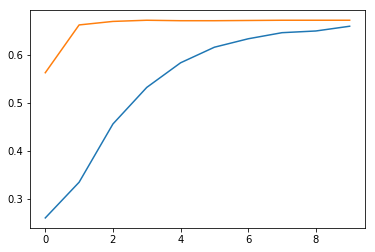

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

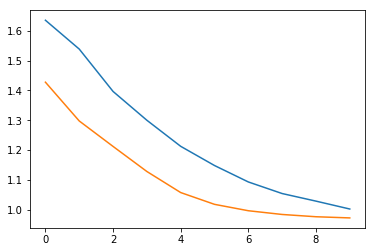

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##GRU 1

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X1.shape[1],dropout=0.2))
model.add(GRU(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2488, 128)         320000    
_________________________________________________________________
gru_2 (GRU)                  (None, 30)                14310     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 334,465
Trainable params: 334,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train1,Y_train1,epochs=10,validation_data=(X_test1,Y_test1),batch_size=500)

Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 115s 4ms/step - loss: 1.4100 - acc: 0.5381 - val_loss: 1.2043 - val_acc: 0.5545
Epoch 2/10
29700/29700 [==============================] - 114s 4ms/step - loss: 1.1574 - acc: 0.5649 - val_loss: 1.1513 - val_acc: 0.5553
Epoch 3/10
29700/29700 [==============================] - 115s 4ms/step - loss: 1.1021 - acc: 0.5686 - val_loss: 1.1151 - val_acc: 0.5603
Epoch 4/10
29700/29700 [==============================] - 117s 4ms/step - loss: 1.0504 - acc: 0.5798 - val_loss: 1.0617 - val_acc: 0.5654
Epoch 5/10
29700/29700 [==============================] - 116s 4ms/step - loss: 1.0066 - acc: 0.5982 - val_loss: 1.0390 - val_acc: 0.5745
Epoch 6/10
29700/29700 [==============================] - 116s 4ms/step - loss: 0.9651 - acc: 0.6141 - val_loss: 1.0183 - val_acc: 0.5788
Epoch 7/10
29700/29700 [==============================] - 116s 4ms/step - loss: 0.9228 - acc: 0.6280 - val_loss: 0.9914 - v

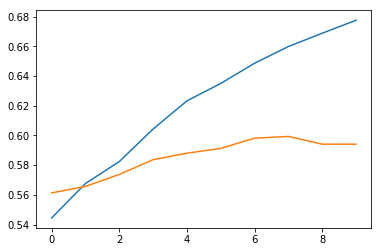

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

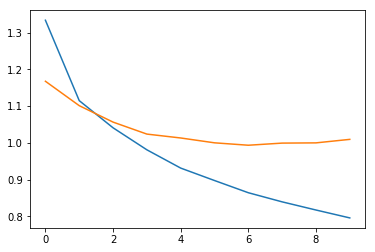

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##GRU 2

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X2.shape[1],dropout=0.2))
model.add(GRU(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1844, 128)         320000    
_________________________________________________________________
gru_4 (GRU)                  (None, 30)                14310     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 155       
Total params: 334,465
Trainable params: 334,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train2,Y_train2,epochs=10,validation_data=(X_test2,Y_test2),batch_size=500)

Train on 8208 samples, validate on 2053 samples
Epoch 1/10
8208/8208 [==============================] - 19s 2ms/step - loss: 1.5878 - acc: 0.4206 - val_loss: 1.5461 - val_acc: 0.6634
Epoch 2/10
8208/8208 [==============================] - 17s 2ms/step - loss: 1.5107 - acc: 0.6773 - val_loss: 1.4551 - val_acc: 0.6712
Epoch 3/10
8208/8208 [==============================] - 17s 2ms/step - loss: 1.4005 - acc: 0.6775 - val_loss: 1.3245 - val_acc: 0.6712
Epoch 4/10
8208/8208 [==============================] - 17s 2ms/step - loss: 1.2482 - acc: 0.6774 - val_loss: 1.1569 - val_acc: 0.6712
Epoch 5/10
8208/8208 [==============================] - 17s 2ms/step - loss: 1.0754 - acc: 0.6774 - val_loss: 1.0142 - val_acc: 0.6712
Epoch 6/10
8208/8208 [==============================] - 17s 2ms/step - loss: 0.9702 - acc: 0.6774 - val_loss: 0.9864 - val_acc: 0.6712
Epoch 7/10
8208/8208 [==============================] - 17s 2ms/step - loss: 0.9462 - acc: 0.6774 - val_loss: 0.9598 - val_acc: 0.6712
Epoch 8

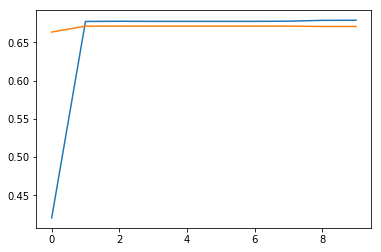

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

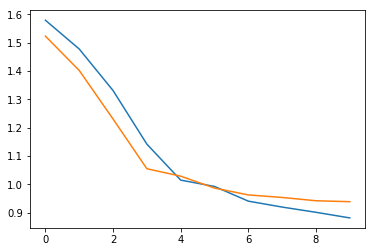

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Simple LSTM 1

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X1.shape[1],dropout=0.2))
model.add(LSTM(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2488, 128)         320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                19080     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 155       
Total params: 339,235
Trainable params: 339,235
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train1,Y_train1,epochs=10,validation_data=(X_test1,Y_test1),batch_size=500)

Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 124s 4ms/step - loss: 1.4738 - acc: 0.5312 - val_loss: 1.2181 - val_acc: 0.5632
Epoch 2/10
29700/29700 [==============================] - 120s 4ms/step - loss: 1.1964 - acc: 0.5626 - val_loss: 1.1674 - val_acc: 0.5632
Epoch 3/10
29700/29700 [==============================] - 119s 4ms/step - loss: 1.1503 - acc: 0.5627 - val_loss: 1.1229 - val_acc: 0.5633
Epoch 4/10
29700/29700 [==============================] - 118s 4ms/step - loss: 1.0866 - acc: 0.5655 - val_loss: 1.0530 - val_acc: 0.5671
Epoch 5/10
29700/29700 [==============================] - 117s 4ms/step - loss: 1.0248 - acc: 0.5801 - val_loss: 1.0135 - val_acc: 0.5778
Epoch 6/10
29700/29700 [==============================] - 117s 4ms/step - loss: 0.9842 - acc: 0.5929 - val_loss: 0.9912 - val_acc: 0.5808
Epoch 7/10
29700/29700 [==============================] - 117s 4ms/step - loss: 0.9556 - acc: 0.6071 - val_loss: 0.9700 - v

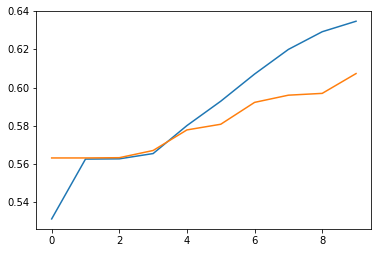

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

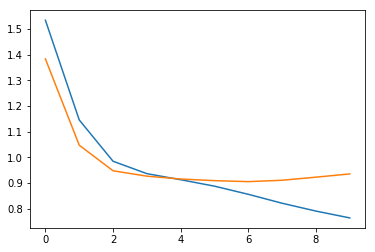

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Simple LSTM 2

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X2.shape[1],dropout=0.2))
model.add(LSTM(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1844, 128)         320000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                19080     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 155       
Total params: 339,235
Trainable params: 339,235
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train2,Y_train2,epochs=10,validation_data=(X_test2,Y_test2),batch_size=500)

Train on 8208 samples, validate on 2053 samples
Epoch 1/10
8208/8208 [==============================] - 26s 3ms/step - loss: 1.5831 - acc: 0.5076 - val_loss: 1.5330 - val_acc: 0.6688
Epoch 2/10
8208/8208 [==============================] - 24s 3ms/step - loss: 1.4809 - acc: 0.6780 - val_loss: 1.3854 - val_acc: 0.6688
Epoch 3/10
8208/8208 [==============================] - 24s 3ms/step - loss: 1.2770 - acc: 0.6780 - val_loss: 1.1100 - val_acc: 0.6688
Epoch 4/10
8208/8208 [==============================] - 24s 3ms/step - loss: 1.0403 - acc: 0.6780 - val_loss: 1.0443 - val_acc: 0.6688
Epoch 5/10
8208/8208 [==============================] - 24s 3ms/step - loss: 1.0027 - acc: 0.6780 - val_loss: 1.0197 - val_acc: 0.6688
Epoch 6/10
8208/8208 [==============================] - 24s 3ms/step - loss: 0.9656 - acc: 0.6780 - val_loss: 0.9750 - val_acc: 0.6688
Epoch 7/10
8208/8208 [==============================] - 24s 3ms/step - loss: 0.9422 - acc: 0.6780 - val_loss: 0.9685 - val_acc: 0.6688
Epoch 8

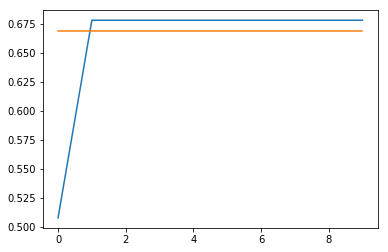

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

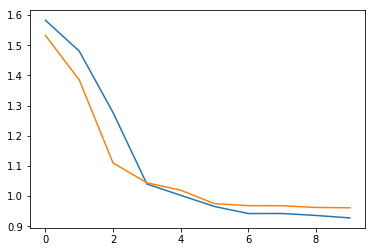

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Bidirectional LSTM 1

In [10]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X1.shape[1],dropout=0.2))
model.add(Bidirectional(LSTM(30, dropout_U=0.2,dropout_W=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

W0801 15:05:55.514665 140610233124736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 15:05:55.529463 140610233124736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 15:05:55.532192 140610233124736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 15:05:55.678092 140610233124736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 15:05:55.687085 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2467, 128)         320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60)                38160     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 305       
Total params: 358,465
Trainable params: 358,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train1,Y_train1,epochs=10,validation_data=(X_test1,Y_test1),batch_size=500)

W0729 07:17:42.369988 140444370687872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 599s 20ms/step - loss: 1.2671 - acc: 0.5524 - val_loss: 1.1313 - val_acc: 0.5730
Epoch 2/10
29700/29700 [==============================] - 595s 20ms/step - loss: 1.0499 - acc: 0.5749 - val_loss: 0.9769 - val_acc: 0.5991
Epoch 3/10
29700/29700 [==============================] - 594s 20ms/step - loss: 0.9725 - acc: 0.5994 - val_loss: 0.9592 - val_acc: 0.6042
Epoch 4/10
29700/29700 [==============================] - 594s 20ms/step - loss: 0.9395 - acc: 0.6101 - val_loss: 0.9450 - val_acc: 0.6056
Epoch 5/10
29700/29700 [==============================] - 594s 20ms/step - loss: 0.9144 - acc: 0.6199 - val_loss: 0.9296 - val_acc: 0.6145
Epoch 6/10
29700/29700 [==============================] - 593s 20ms/step - loss: 0.8900 - acc: 0.6299 - val_loss: 0.9221 - val_acc: 0.6128
Epoch 7/10
29700/29700 [==============================] - 594s 20ms/step - loss: 0.8699 - acc: 0.6424 - val_loss: 0.9

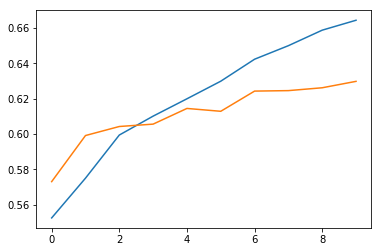

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

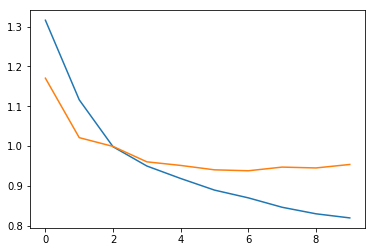

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###Oversampled

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X1.shape[1],dropout=0.2))
model.add(Bidirectional(LSTM(30, dropout_U=0.2,dropout_W=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

In [11]:
###Oversampled 1
history=model.fit(X_train1,Y_train1,epochs=5,validation_data=(X_test1,Y_test1),batch_size=700)

W0801 15:06:08.712048 140610233124736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 61167 samples, validate on 15292 samples
Epoch 1/5
61167/61167 [==============================] - 1377s 23ms/step - loss: 1.4289 - acc: 0.3849 - val_loss: 1.1835 - val_acc: 0.5246
Epoch 2/5
61167/61167 [==============================] - 1358s 22ms/step - loss: 1.1149 - acc: 0.5512 - val_loss: 1.0489 - val_acc: 0.5801
Epoch 3/5
61167/61167 [==============================] - 1355s 22ms/step - loss: 1.0158 - acc: 0.5991 - val_loss: 0.9916 - val_acc: 0.6079
Epoch 4/5
61167/61167 [==============================] - 1360s 22ms/step - loss: 0.9512 - acc: 0.6328 - val_loss: 0.9414 - val_acc: 0.6363
Epoch 5/5
61167/61167 [==============================] - 1360s 22ms/step - loss: 0.8988 - acc: 0.6574 - val_loss: 0.8968 - val_acc: 0.6590


In [13]:
###Oversampled 2
history=model.fit(X_train1,Y_train1,epochs=5,validation_data=(X_test1,Y_test1),batch_size=700)

Train on 61167 samples, validate on 15292 samples
Epoch 1/5
61167/61167 [==============================] - 1362s 22ms/step - loss: 0.8566 - acc: 0.6760 - val_loss: 0.8697 - val_acc: 0.6720
Epoch 2/5
61167/61167 [==============================] - 1361s 22ms/step - loss: 0.8420 - acc: 0.6804 - val_loss: 0.8566 - val_acc: 0.6756
Epoch 3/5
61167/61167 [==============================] - 1363s 22ms/step - loss: 0.7892 - acc: 0.7023 - val_loss: 0.8183 - val_acc: 0.6959
Epoch 4/5
61167/61167 [==============================] - 1362s 22ms/step - loss: 0.7616 - acc: 0.7136 - val_loss: 0.7975 - val_acc: 0.7018
Epoch 5/5
61167/61167 [==============================] - 1347s 22ms/step - loss: 0.7338 - acc: 0.7264 - val_loss: 0.7619 - val_acc: 0.7199


##Bidirectional LSTM 2

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X2.shape[1],dropout=0.2))
model.add(Bidirectional(LSTM(30, dropout_U=0.2,dropout_W=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1820, 128)         320000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 60)                38160     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 305       
Total params: 358,465
Trainable params: 358,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train2,Y_train2,epochs=10,validation_data=(X_test2,Y_test2),batch_size=500)

W0729 14:38:21.580045 140311138011008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8208 samples, validate on 2053 samples
Epoch 1/10
8208/8208 [==============================] - 123s 15ms/step - loss: 1.3950 - acc: 0.6168 - val_loss: 1.0520 - val_acc: 0.6844
Epoch 2/10
8208/8208 [==============================] - 122s 15ms/step - loss: 1.0120 - acc: 0.6741 - val_loss: 0.9354 - val_acc: 0.6844
Epoch 3/10
8208/8208 [==============================] - 121s 15ms/step - loss: 0.9500 - acc: 0.6741 - val_loss: 0.9214 - val_acc: 0.6844
Epoch 4/10
8208/8208 [==============================] - 121s 15ms/step - loss: 0.9297 - acc: 0.6741 - val_loss: 0.9064 - val_acc: 0.6844
Epoch 5/10
8208/8208 [==============================] - 120s 15ms/step - loss: 0.8955 - acc: 0.6741 - val_loss: 0.8797 - val_acc: 0.6844
Epoch 6/10
8208/8208 [==============================] - 121s 15ms/step - loss: 0.8463 - acc: 0.6840 - val_loss: 0.8597 - val_acc: 0.6800
Epoch 7/10
8208/8208 [==============================] - 120s 15ms/step - loss: 0.8044 - acc: 0.6941 - val_loss: 0.8602 - val_acc: 

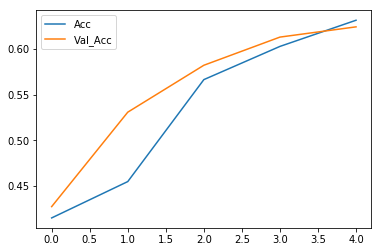

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Acc','Val_Acc'])

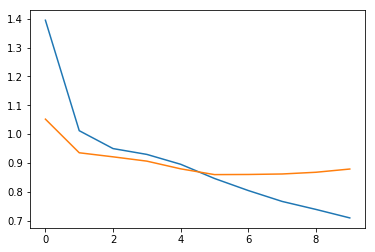

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

###Oversampled

In [0]:
model.save('BidirectionalLSTM2_oversampled.h5')

In [0]:
###Oversampled 1
history=model.fit(X_train2,Y_train2,epochs=5,validation_data=(X_test2,Y_test2),batch_size=500)

Train on 12824 samples, validate on 3206 samples
Epoch 1/5
12824/12824 [==============================] - 247s 19ms/step - loss: 1.5023 - acc: 0.4250 - val_loss: 1.4457 - val_acc: 0.4248
Epoch 2/5
12824/12824 [==============================] - 243s 19ms/step - loss: 1.3978 - acc: 0.4350 - val_loss: 1.3278 - val_acc: 0.4270
Epoch 3/5
12824/12824 [==============================] - 243s 19ms/step - loss: 1.2271 - acc: 0.5196 - val_loss: 1.1354 - val_acc: 0.5686
Epoch 4/5
12824/12824 [==============================] - 244s 19ms/step - loss: 1.0536 - acc: 0.6146 - val_loss: 0.9850 - val_acc: 0.6394
Epoch 5/5
12824/12824 [==============================] - 243s 19ms/step - loss: 0.9101 - acc: 0.6766 - val_loss: 0.8689 - val_acc: 0.6990


In [0]:
###Oversampled 2
history=model.fit(X_train2,Y_train2,epochs=5,validation_data=(X_test2,Y_test2),batch_size=500)

Train on 12824 samples, validate on 3206 samples
Epoch 1/5
12824/12824 [==============================] - 243s 19ms/step - loss: 0.8068 - acc: 0.7221 - val_loss: 0.7128 - val_acc: 0.7661
Epoch 2/5
12824/12824 [==============================] - 242s 19ms/step - loss: 0.7149 - acc: 0.7567 - val_loss: 0.6572 - val_acc: 0.7810
Epoch 3/5
12824/12824 [==============================] - 241s 19ms/step - loss: 0.6467 - acc: 0.7768 - val_loss: 0.6139 - val_acc: 0.7888
Epoch 4/5
12824/12824 [==============================] - 242s 19ms/step - loss: 0.5941 - acc: 0.7910 - val_loss: 0.5794 - val_acc: 0.7969
Epoch 5/5
12824/12824 [==============================] - 243s 19ms/step - loss: 0.5559 - acc: 0.7984 - val_loss: 0.5568 - val_acc: 0.8016


##My example

**BAD EXAMPLE**

In [0]:
ss=np.array(["Very bad product, useless waste"])

tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X2)
ss = tokenizer.texts_to_sequences(ss)
ss = pad_sequences(ss,maxlen=1820)   ##1820 because based on dataset 2, that is the configuration of the model
output=model.predict(ss)
print(output)

[[0.43569613 0.27017704 0.2057942  0.04750998 0.04082273]]


In [0]:
np.argmax(output)

0

**Medium Example**

In [0]:
ss=np.array(["It's okay, not that great, but useful"])

tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X2)
ss = tokenizer.texts_to_sequences(ss)
ss = pad_sequences(ss,maxlen=1820)   ##1820 because based on dataset 2, that is the configuration of the model
output=model.predict(ss)
print(output)

[[0.14956002 0.21396787 0.34383577 0.1442001  0.1484362 ]]


In [0]:
np.argmax(output)

2

**GOOD EXAMPLE**

In [0]:
ss=np.array(["Good product! excellent choice"])
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X2)
ss = tokenizer.texts_to_sequences(ss)
ss = pad_sequences(ss,maxlen=1820)

output=model.predict(ss)
print(output)

[[0.01514664 0.04104379 0.09784835 0.22063209 0.62532914]]


In [0]:
np.argmax(output)

4

###Confusion Matrix

In [0]:
#from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_test2)

In [0]:
Y_pred

array([[0.01857104, 0.01043268, 0.03490482, 0.15026663, 0.78582484],
       [0.00645488, 0.00408534, 0.01643613, 0.12019697, 0.8528267 ],
       [0.03583751, 0.03848594, 0.14319637, 0.34623334, 0.4362469 ],
       ...,
       [0.00376264, 0.00157525, 0.00584735, 0.04276349, 0.94605124],
       [0.00616191, 0.00331085, 0.01680251, 0.09013866, 0.88358605],
       [0.00258934, 0.00113525, 0.00514255, 0.03979928, 0.9513335 ]],
      dtype=float32)

In [0]:
###OLD
confusion_matrix(np.argmax(Y_test2,axis=1),np.argmax(Y_pred,axis=1))

array([[   0,    0,    0,   23,   19],
       [   0,    0,    0,   35,   35],
       [   0,    0,    0,   88,   55],
       [   0,    0,    0,  134,  289],
       [   0,    0,    0,  165, 1210]])

In [0]:
cm_old=np.array([[   0,    0,    0,   23,   19],
       [   0,    0,    0,   35,   35],
       [   0,    0,    0,   88,   55],
       [   0,    0,    0,  134,  289],
       [   0,    0,    0,  165, 1210]])

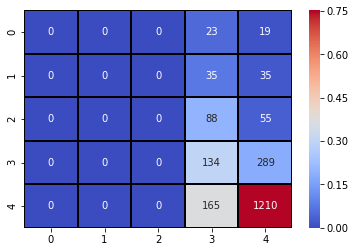

In [0]:
sns.heatmap(np.divide(cm_old,cm_old.sum(axis=0),where=cm_old.sum(axis=0)!=0),cmap='coolwarm',annot=cm_old,fmt='g',linewidths=1, linecolor='black')

In [0]:
###NEW
cm=confusion_matrix(np.argmax(Y_test2,axis=1),np.argmax(Y_pred,axis=1))

In [0]:
cm

array([[ 439,    5,    0,    0,    0],
       [  22,  309,   24,    3,    6],
       [   9,   19,  493,   10,   60],
       [   8,   15,  102,    5,  307],
       [  17,   16,  111,   12, 1214]])

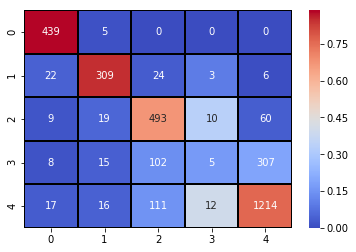

In [0]:
sns.heatmap(cm/cm.sum(axis=0),cmap='coolwarm',annot=cm,fmt='g',linewidths=1, linecolor='black')